In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data=pd.read_csv("/content/final_data.csv")
df=data.drop(data.columns[0],axis=1)
df

,Number of gates,Number of flops,Number of Test Vectors,Equivalent Area of Block,Test Power(in uJoules)
0,695,283,3,576,694.915209
1,755,289,5,976,699.192675
2,765,289,5,1036,697.822985
3,805,295,6,1176,709.831915
4,805,294,7,1176,707.501416
...,...,...,...,...,...
5627,775,289,4,976,700.733356
5628,910,299,5,1626,711.156631
5629,825,289,3,1226,695.672885
5630,835,294,4,1256,706.976219


In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn import metrics
print("mean square error using Random Forest Regressor:",metrics.mean_squared_error(y_test, y_pred))

mean square error using Random Forest Regressor: 9.688475288523276e-25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


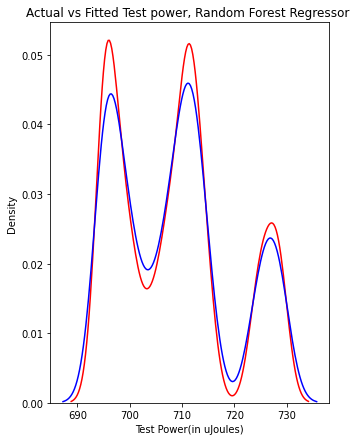

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Test power, Random Forest Regressor ')


plt.show()

#Bagging

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
# define the model
model = BaggingRegressor(random_state=42)
# evaluate the model
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn import metrics
print("mean square error after Bagging:",metrics.mean_squared_error(y_test, y_pred))

mean square error after Bagging: 3.7010520121940847e-25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


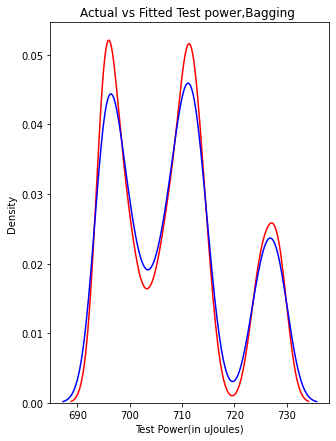

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Test power,Bagging ')


plt.show()

#Boosting

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
# define the model
model = GradientBoostingRegressor(random_state=42)
# evaluate the model
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn import metrics
print("mean square error after Boosting:",metrics.mean_squared_error(y_test, y_pred))

mean square error after Boosting: 0.0007794173805528917


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


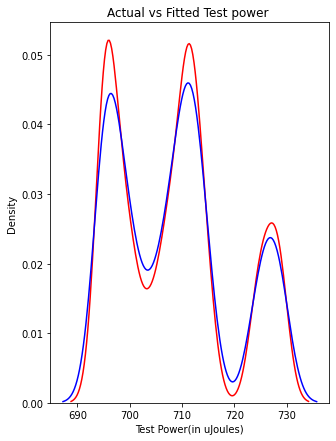

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Test power ')


plt.show()